# Team Notebook Project Stage 2

## Read Total Cases and Total Deaths

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [43]:
cases_data = pd.read_csv('total_cases.csv')
death_data = pd.read_csv('total_deaths.csv')

In [44]:
cases_data.head()

,date,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Set Dates to datetime

In [45]:
# Turn the date column into a datetime object so that it can be compared and turned into weekly groups

cases_data['date'] = pd.to_datetime(cases_data['date'])
death_data['date'] = pd.to_datetime(death_data['date'])

cases_data.set_index('date', inplace=True)
death_data.set_index('date', inplace=True)

## Merge Cases and Deaths Data

In [46]:
# Merge and add new suffixes
merged_data = pd.merge(cases_data, death_data, left_index=True, right_index=True, how='outer', suffixes=('_cases', '_deaths'))


In [47]:
us_cases = merged_data['United States_cases']
us_deaths = merged_data['United States_deaths']


In [48]:
us_cases.head()


date
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
2020-01-09   NaN
Name: United States_cases, dtype: float64

## Set Dates and and Filter from July to December

In [49]:
# Specify date range for the data
july_dates = pd.date_range(start='2020-07-01', end='2020-07-31')
december_dates = pd.date_range(start='2020-12-01', end='2020-12-31')


first_monday_july = july_dates[july_dates.weekday == 0][0]
last_sunday_december = december_dates[december_dates.weekday == 6][-1]


In [50]:

us_cases = merged_data['United States_cases']
us_deaths = merged_data['United States_deaths']

In [51]:
# Filter US cases to be between the first monday of July and the last sunday of December
us_cases_filtered = us_cases[first_monday_july:last_sunday_december]
us_deaths_filtered = us_deaths[first_monday_july:last_sunday_december]


In [52]:
us_cases_filtered.head(300)

date
2020-07-06     2867543.0
2020-07-07     2867543.0
2020-07-08     2867543.0
2020-07-09     2867543.0
2020-07-10     2867543.0
                 ...    
2020-12-23    17530324.0
2020-12-24    17530324.0
2020-12-25    17530324.0
2020-12-26    17530324.0
2020-12-27    18890446.0
Name: United States_cases, Length: 175, dtype: float64

In [53]:
us_deaths_filtered.head(30)

date
2020-07-06    131669.0
2020-07-07    131669.0
2020-07-08    131669.0
2020-07-09    131669.0
2020-07-10    131669.0
2020-07-11    131669.0
2020-07-12    137198.0
2020-07-13    137198.0
2020-07-14    137198.0
2020-07-15    137198.0
2020-07-16    137198.0
2020-07-17    137198.0
2020-07-18    137198.0
2020-07-19    143864.0
2020-07-20    143864.0
2020-07-21    143864.0
2020-07-22    143864.0
2020-07-23    143864.0
2020-07-24    143864.0
2020-07-25    143864.0
2020-07-26    151590.0
2020-07-27    151590.0
2020-07-28    151590.0
2020-07-29    151590.0
2020-07-30    151590.0
2020-07-31    151590.0
2020-08-01    151590.0
2020-08-02    159736.0
2020-08-03    159736.0
2020-08-04    159736.0
Name: United States_deaths, dtype: float64

## Resample Data to be in Weekly Format

In [54]:
# Change the data to sum it by week to create weekly stats
weekly_cases = us_cases_filtered.resample('W-MON').sum()
weekly_deaths = us_deaths_filtered.resample('W-MON').sum()


## Calculate Mean and Median of US Cases and Deaths

In [55]:

weekly_cases_mean = weekly_cases.mean()
weekly_cases_median = weekly_cases.median()


weekly_deaths_mean = weekly_deaths.mean()
weekly_deaths_median = weekly_deaths.median()

print("US Mean cases:", weekly_cases_mean)
print("US Median cases:", weekly_cases_median)
print("US Mean Deaths:", weekly_deaths_mean)
print("US Median Deaths:", weekly_deaths_median)


US Mean cases: 55169047.538461536
US Median cases: 49244085.0
US Mean Deaths: 1435736.8076923077
US Median Deaths: 1452898.0


# Plot US Data

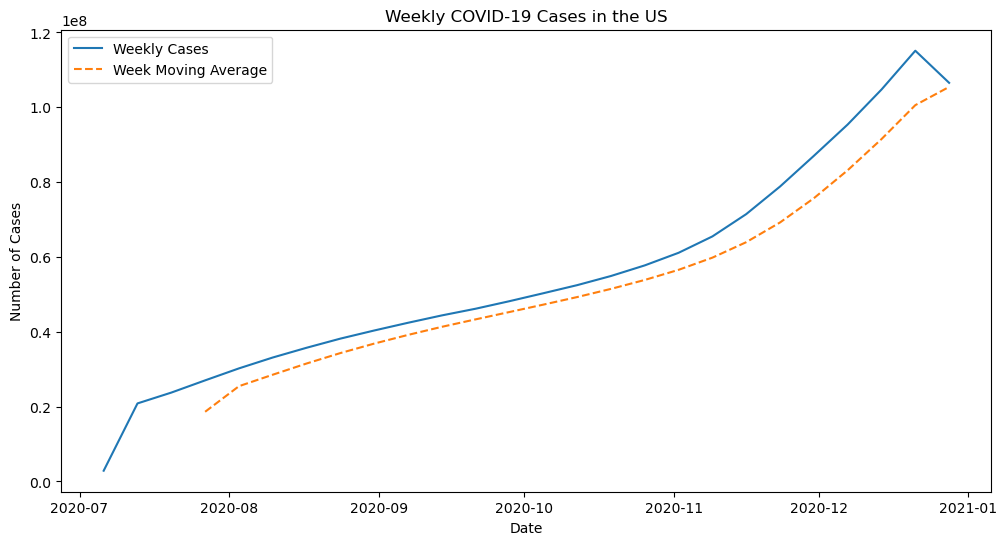

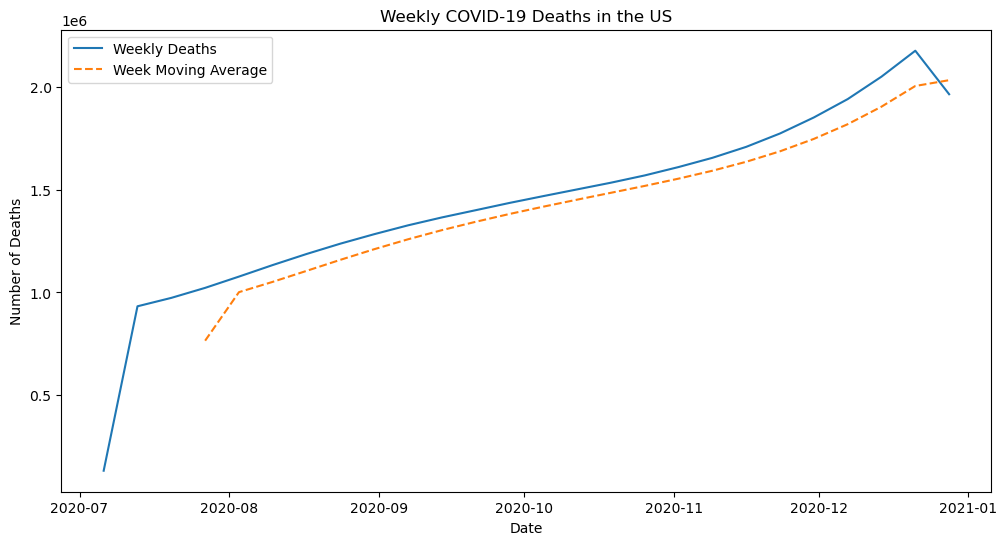

In [56]:
# Plotting the weekly covid cases and deaths in the US
plt.figure(figsize=(12, 6))
plt.plot(weekly_cases.index, weekly_cases, label='Weekly Cases')
plt.plot(weekly_cases.index, weekly_cases.rolling(window=4).mean(), label='Week Moving Average', linestyle='--')
plt.title('Weekly COVID-19 Cases in the US')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(weekly_deaths.index, weekly_deaths, label='Weekly Deaths')
plt.plot(weekly_deaths.index, weekly_deaths.rolling(window=4).mean(), label='Week Moving Average', linestyle='--')
plt.title('Weekly COVID-19 Deaths in the US')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()


## Plot Other 5 Countries

            United States      France  United Kingdom       Russia  \
date                                                                 
2020-07-06     866.320252   31.338899      422.167978   466.819825   
2020-07-13    6301.221739  228.113974     2967.794057  3330.658799   
2020-07-20    7175.401746  260.722914     3012.125724  3548.786167   
2020-07-27    8162.444294  304.661105     3058.730318  3756.960436   
2020-08-03    9129.809658  370.808918     3111.602772  3949.831261   

                Germany       Canada  
date                                  
2020-07-06   234.930460   278.412833  
2020-07-13  1650.311464  1959.673526  
2020-07-20  1672.073391  2000.113719  
2020-07-27  1699.634758  2052.548458  
2020-08-03  1734.684434  2115.833134  


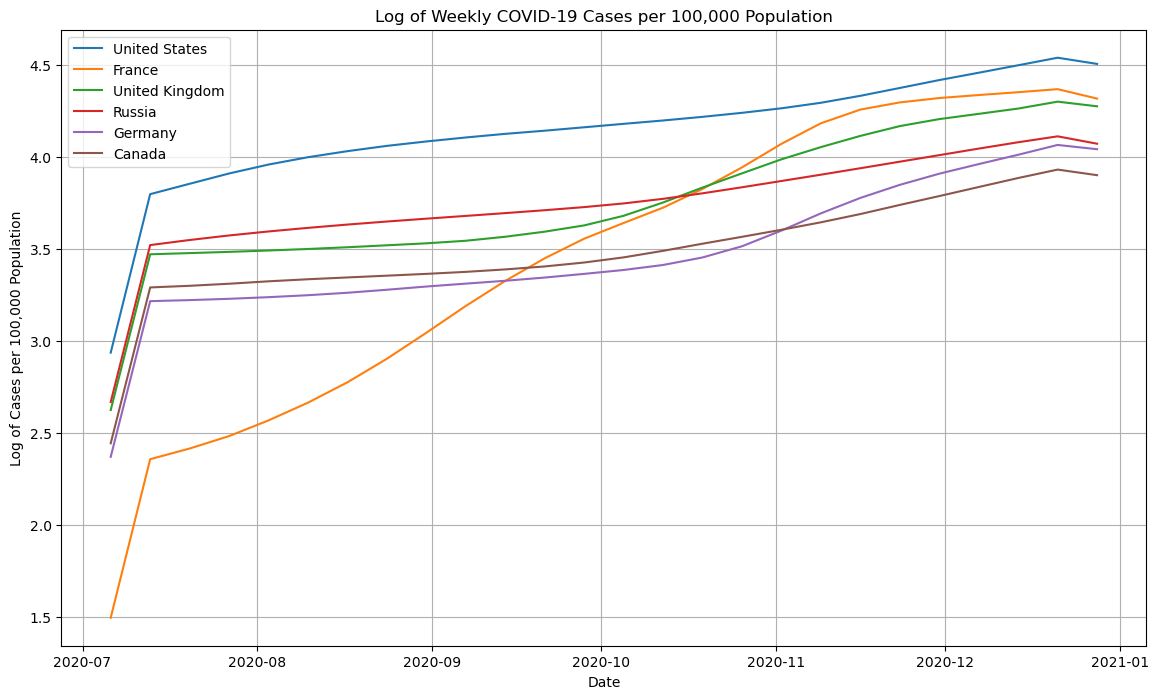

In [57]:

population = {
    'United States': 331002651,
    'France': 65273511,
    'United Kingdom': 67886011,
    'Russia': 145934462,
    'Germany': 83783942,
    'Canada': 37742154,
}


weekly_cases_per_100k = pd.DataFrame()

start_date = '2020-07-06'
end_date = '2020-12-27'

# Set up the other countries with weekly incremements
for country, pop in population.items():
    country_col_name_cases = f'{country}_cases'  

    country_cases = merged_data[country_col_name_cases][start_date:end_date]
    country_cases_weekly = country_cases.resample('W-MON').sum()
    country_cases_weekly_per_100k = (country_cases_weekly / pop) * 100000
    weekly_cases_per_100k[country] = country_cases_weekly_per_100k


print(weekly_cases_per_100k.head())

weekly_cases_log = np.log10(weekly_cases_per_100k.replace(0, np.nan)) 

# Plot log of weekly covid casess per 100,000
plt.figure(figsize=(14, 8))
for country in weekly_cases_log.columns:
    plt.plot(weekly_cases_log.index, weekly_cases_log[country], label=country)
plt.title('Log of Weekly COVID-19 Cases per 100,000 Population')
plt.xlabel('Date')
plt.ylabel('Log of Cases per 100,000 Population')
plt.legend()
plt.grid(True)
plt.show()


## Find Peak Weeks

In [58]:
peak_weeks_cases = weekly_cases_per_100k.idxmax()
print("Peak weeks for COVID-19 cases per 100,000 population:")
print(peak_weeks_cases)


Peak weeks for COVID-19 cases per 100,000 population:
United States    2020-12-21
France           2020-12-21
United Kingdom   2020-12-21
Russia           2020-12-21
Germany          2020-12-21
Canada           2020-12-21
dtype: datetime64[ns]


In [59]:
weekly_deaths_per_100k = pd.DataFrame()

for country, pop in population.items():
    country_col_name_deaths = f'{country}_deaths' 


    country_deaths = merged_data[country_col_name_deaths][start_date:end_date]
    country_deaths_weekly = country_deaths.resample('W-MON').sum()

    country_deaths_weekly_per_100k = (country_deaths_weekly / pop) * 100000

    weekly_deaths_per_100k[country] = country_deaths_weekly_per_100k

print(weekly_deaths_per_100k.head())


            United States      France  United Kingdom     Russia    Germany  \
date                                                                          
2020-07-06      39.778835   29.754796       82.918409   6.962715  11.103560   
2020-07-13     281.792607  208.651255      581.468839  50.347943  77.784595   
2020-07-20     294.172266  209.858483      584.814153  55.750368  78.007788   
2020-07-27     308.909913  210.878805      587.284470  60.470980  78.271562   
2020-08-03     325.502529  211.865423      589.317290  64.824304  78.556819   

                Canada  
date                    
2020-07-06   22.857731  
2020-07-13  160.512831  
2020-07-20  162.203249  
2020-07-27  163.472387  
2020-08-03  164.309647  


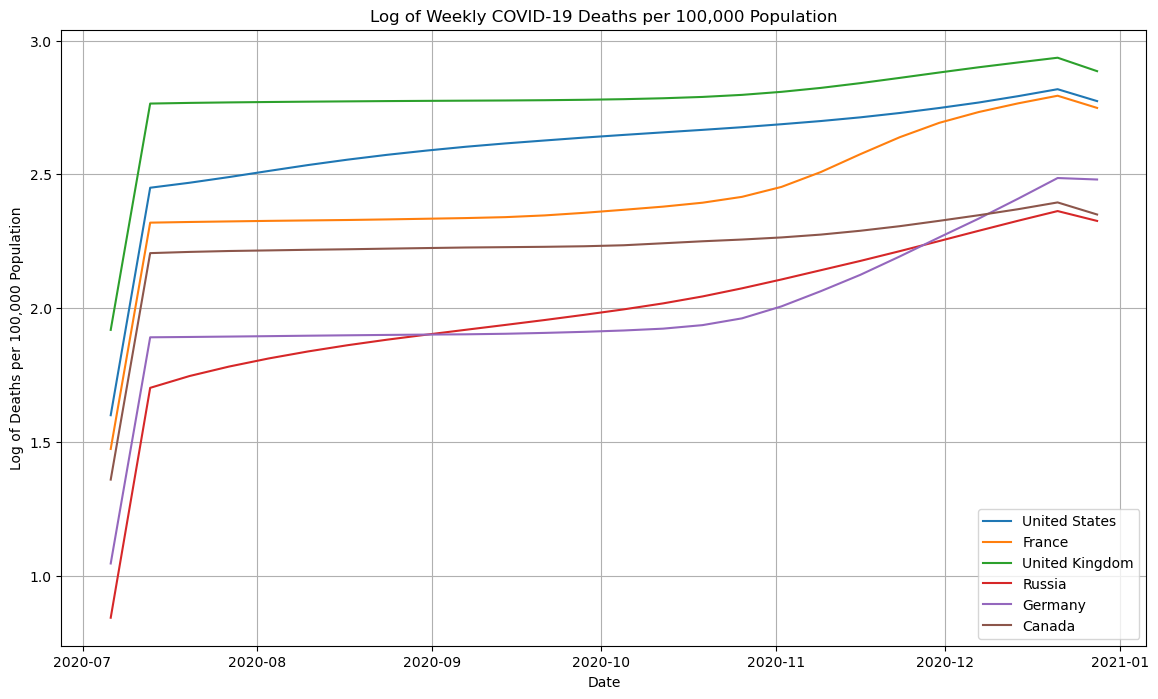

In [60]:
weekly_deaths_log = np.log10(weekly_deaths_per_100k.replace(0, np.nan))


plt.figure(figsize=(14, 8))
for country in weekly_deaths_log.columns:
    plt.plot(weekly_deaths_log.index, weekly_deaths_log[country], label=country)
plt.title('Log of Weekly COVID-19 Deaths per 100,000 Population')
plt.xlabel('Date')
plt.ylabel('Log of Deaths per 100,000 Population')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
peak_weeks_deaths = weekly_deaths_per_100k.idxmax()
print("Peak weeks for COVID-19 deaths per 100,000 population:")
print(peak_weeks_deaths)


Peak weeks for COVID-19 deaths per 100,000 population:
United States    2020-12-21
France           2020-12-21
United Kingdom   2020-12-21
Russia           2020-12-21
Germany          2020-12-21
Canada           2020-12-21
dtype: datetime64[ns]


The peak week for cases and deaths of COVID between July and December was the week that began with 12-21-2020. This is most likely due to the fact that Christmas was right around the corner. Many people were visiting family and traveling which could definitely lead to more infections and deaths around Christmas. Although the US was under lockdown, it is still very possible that travel did happen as the lockdown was originally supposed to end on December 21st.